In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

In [2]:
def plot_data(data):
    x_label = data.columns[0]
    y_label = data.columns[1]
    plt.plot(data[x_label], data[y_label])
    plt.xlabel(x_label)
    plt.ylabel(y_label)

In [3]:
def get_largo(data):
    data_r = data["r"]
    return data_r.mean()

In [4]:
def format_pd(data, feature):
    data = data.dropna()
    # Arranca en t = 0
    print(data["t"].iloc[0])
    data["t"] = data["t"] - data["t"].iloc[0]
    # Selecciona la columna de interés
    try:
        data = data[["t", feature]]
    except KeyError:
        data = data[["t", "θ"]]
    return data

In [5]:
def get_tita0(data):
    try:
        return data["θr"].iloc[0]
    except KeyError:
        return data["θ"].iloc[0]

def get_amplitud(data):  # asumo amplitud como Asen(θ)
    try:
        return (max(data["θr"]) - min(data["θr"])) / 2
    except KeyError:
        return (max(data["θ"]) - min(data["θ"])) / 2

def get_periodo(data):
    try:
        # Localizo un máximo y un mínimo
        maximo = data["θ"].idxmax()
        minimo = data["θ"].idxmin()
        # Calculo el periodo
        return abs((data["t"].iloc[maximo] - data["t"].iloc[minimo])) * 2 # *2 porque es de pico a pico
    except KeyError:
        # Localizo un máximo y un mínimo
        maximo = data["θr"].idxmax()
        minimo = data["θr"].idxmin()
        # Calculo el periodo
        return abs((data["t"].iloc[maximo] - data["t"].iloc[minimo])) * 2 # *2 porque es de pico a pico

def get_frecuencia(data):
    return 1 / get_periodo(data) # NO está en rad/sec, está en Hz

In [6]:
def plot_approximation(data, tita0, amplitud, frecuencia, periodo):
    x = data["t"]
    print(x[0])
    delta = np.arcsin(tita0 / amplitud)
    y = amplitud * np.sin(2 * np.pi * (-frecuencia) * x + delta)
    print(y[0])
    plt.plot(x, y)

0: plata l3/plata50.csv
2.203


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


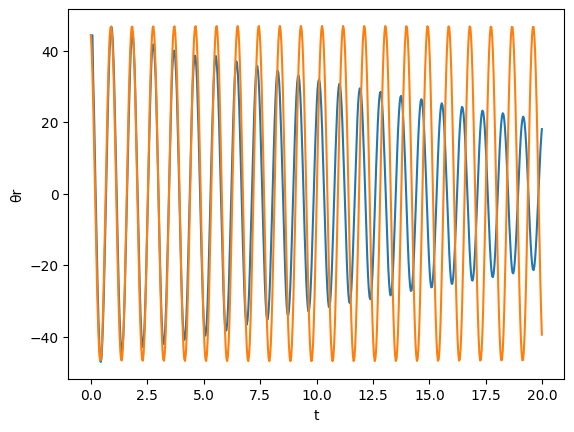

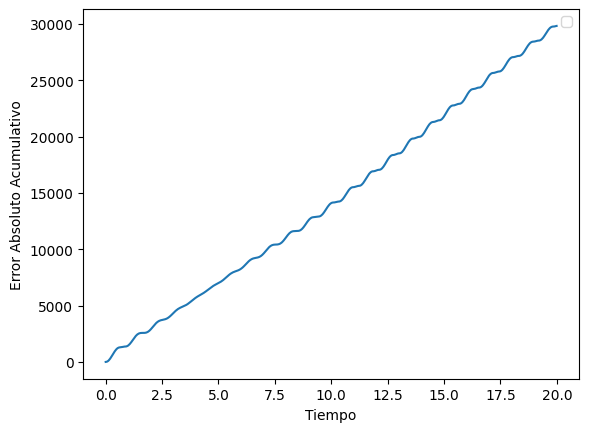

1: plata l3/plata45.csv
1.335


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


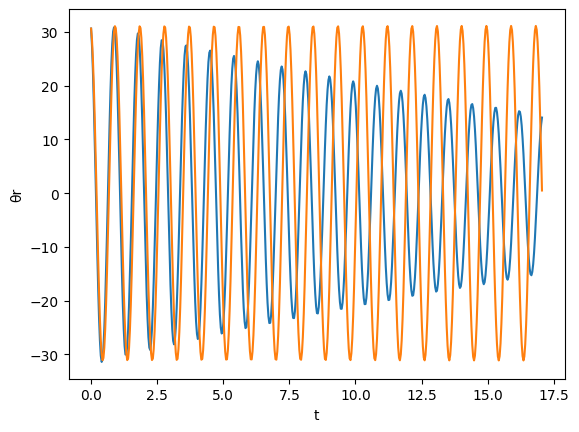

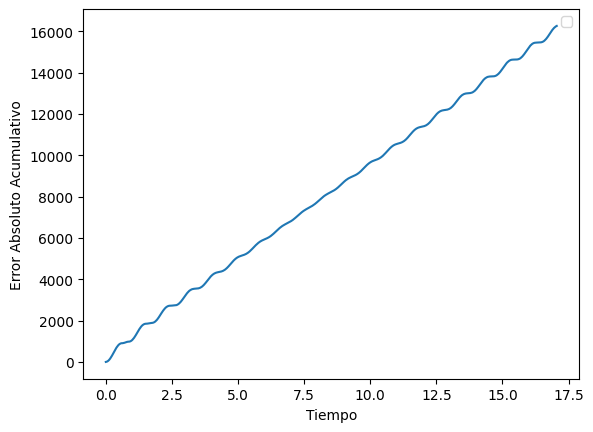

2: plata l3/plata40.csv
0.534


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:8: RuntimeWarning: invalid value encountered in arcsin
  delta = np.arcsin(tita0 / amplitud)
/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


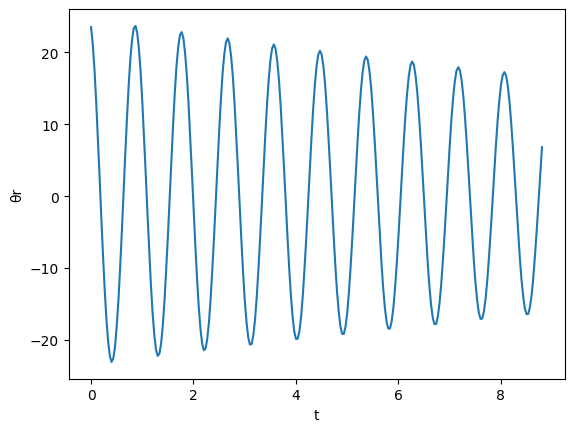

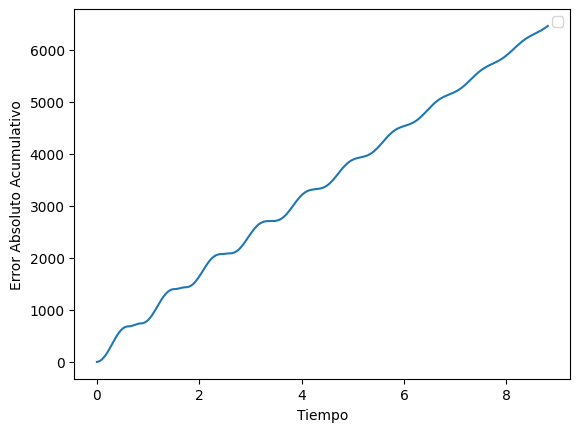

3: plata l3/plata35.csv
0.934


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


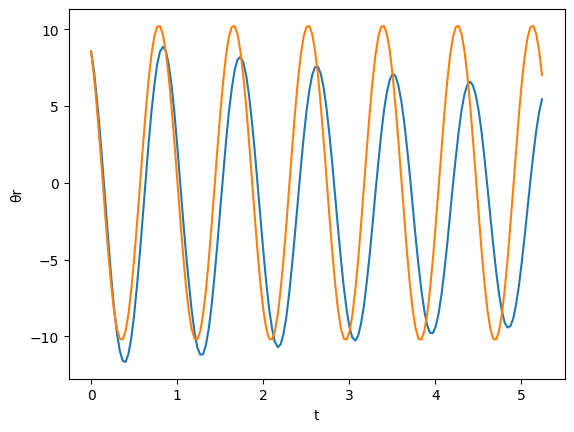

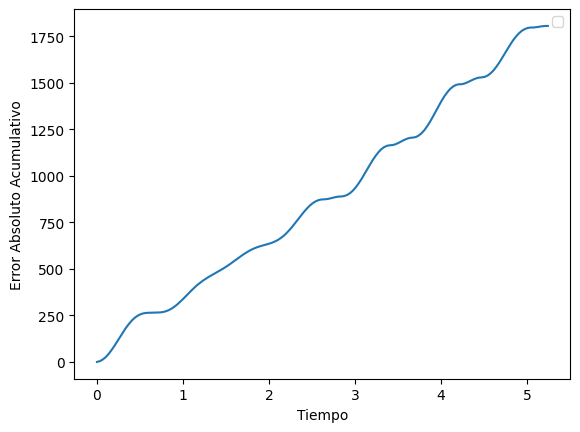

/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


4: oro l1/oro45.csv
1.101


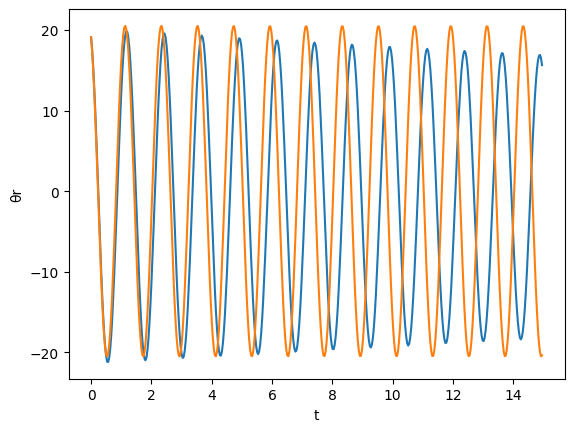

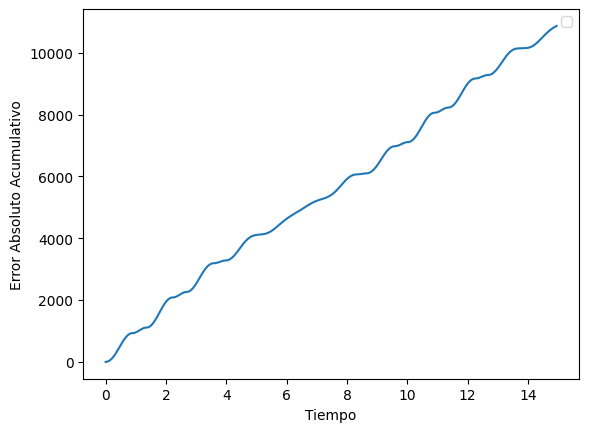

5: oro l1/oro50.csv
1.635


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


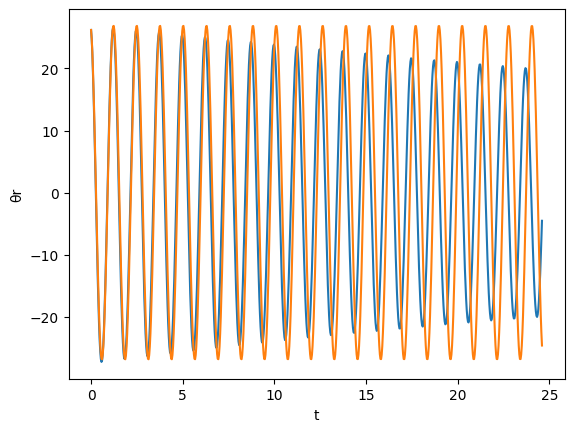

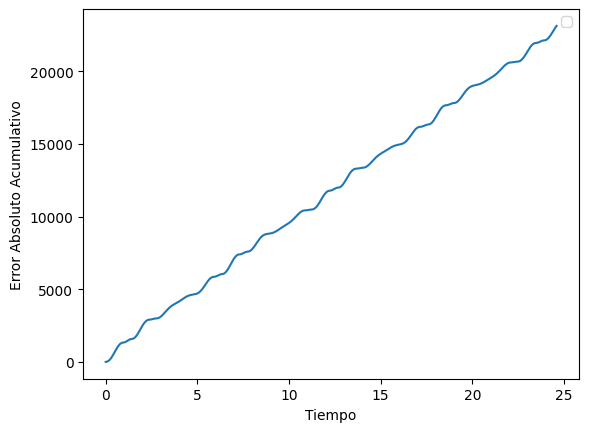

6: oro l1/oro40.csv
2.436


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


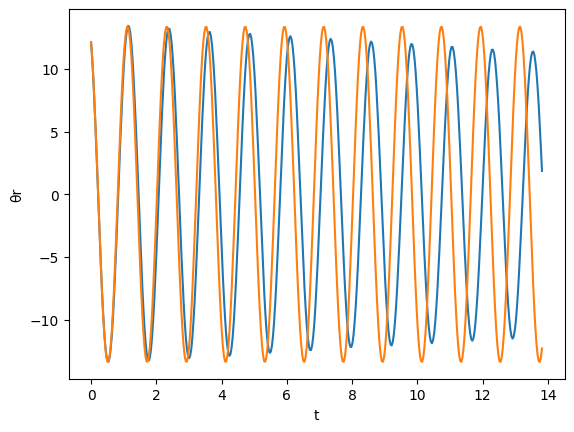

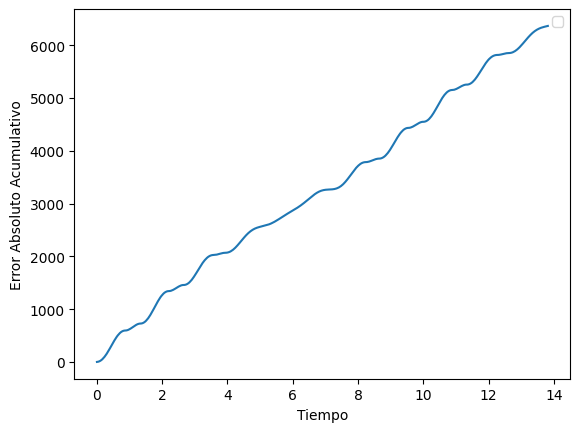

7: oro l1/oro35.csv
0.834


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


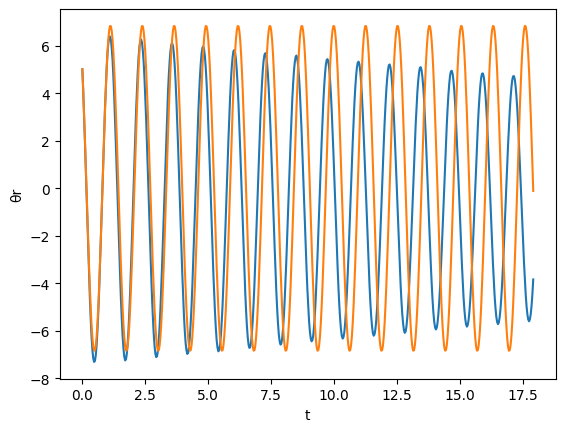

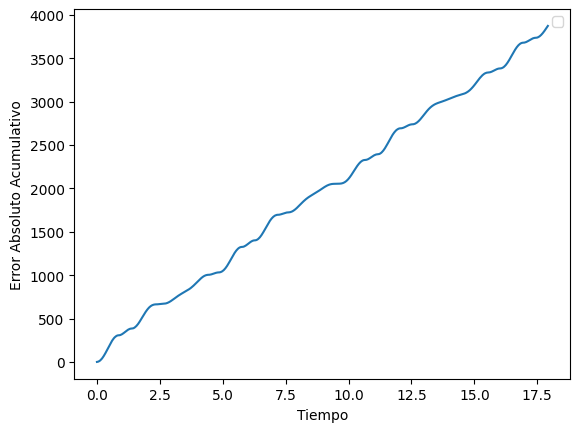

8: plata l2/plata50.csv
1.669


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:8: RuntimeWarning: invalid value encountered in arcsin
  delta = np.arcsin(tita0 / amplitud)
/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


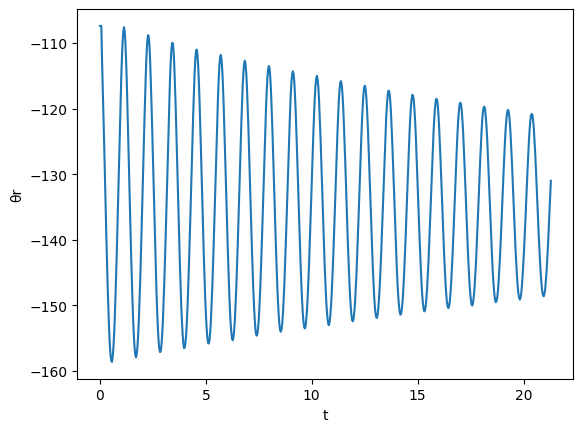

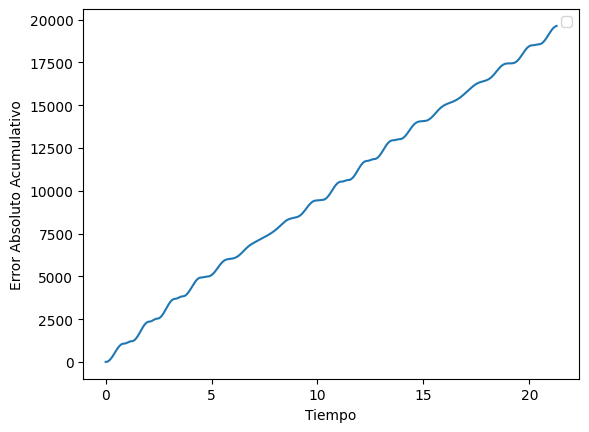

9: plata l2/plata45.csv
0.768


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


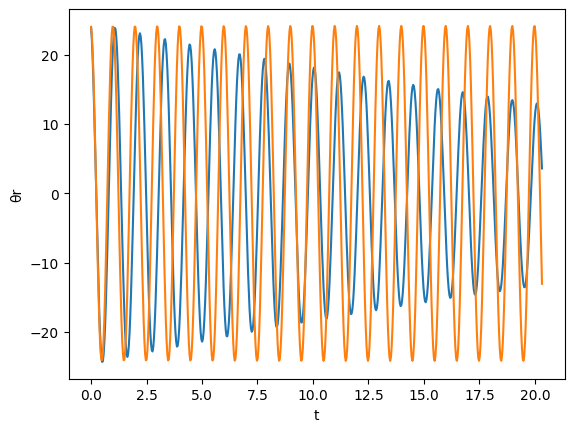

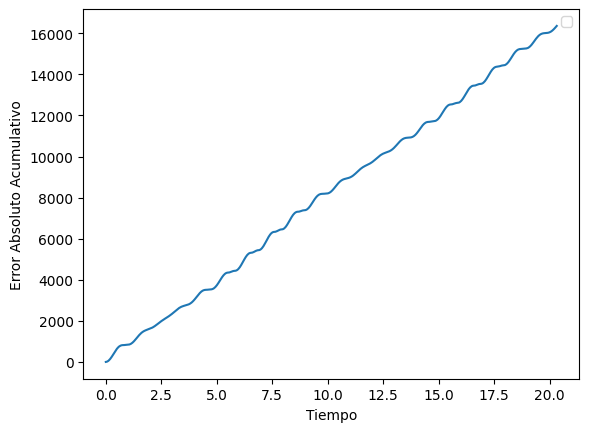

10: plata l2/plata40.csv
2.069


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


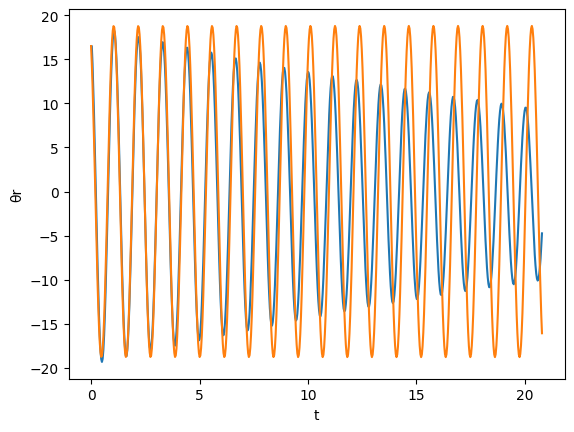

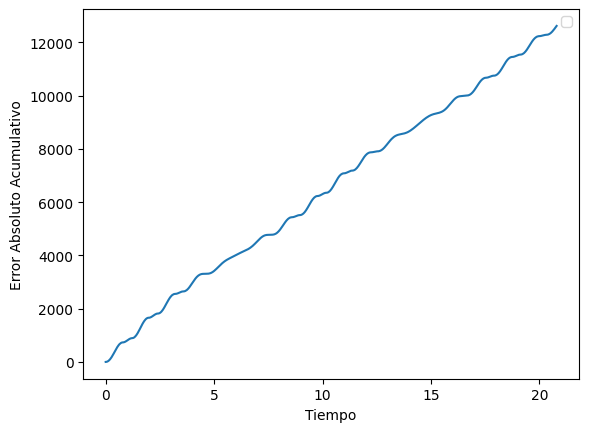

11: plata l2/plata35.csv
1.601667
             t         θ
0     0.000000  6.907937
1     0.033333  6.094686
2     0.066666  5.058630
3     0.100000  3.844100
4     0.133333  2.490368
..         ...       ...
470  15.685003 -0.401648
471  15.718333 -1.151980
472  15.751663 -1.861895
473  15.785003 -2.530105
474  15.818333 -3.100533

[475 rows x 2 columns]


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


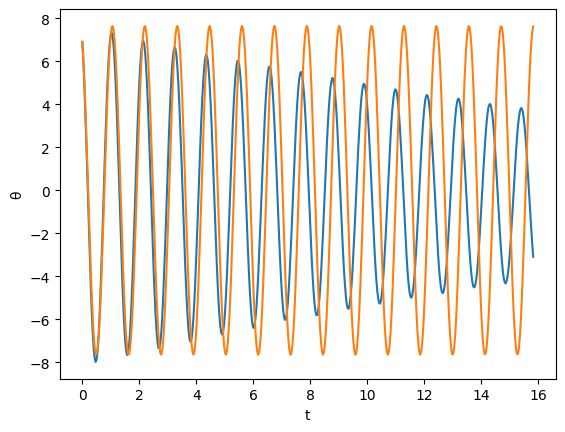

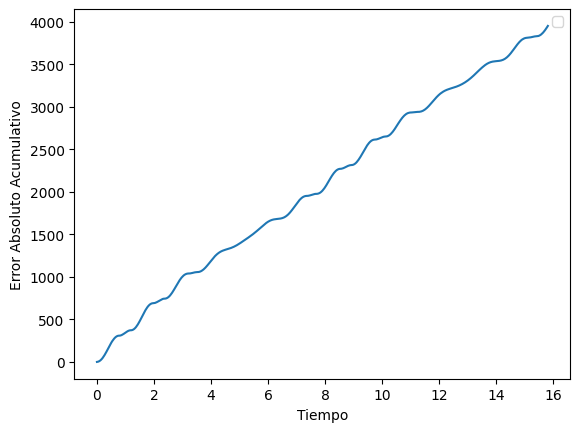

12: plata l0/plata60.csv
1.335


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3295301198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["t"] = data["t"] - data["t"].iloc[0]
/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


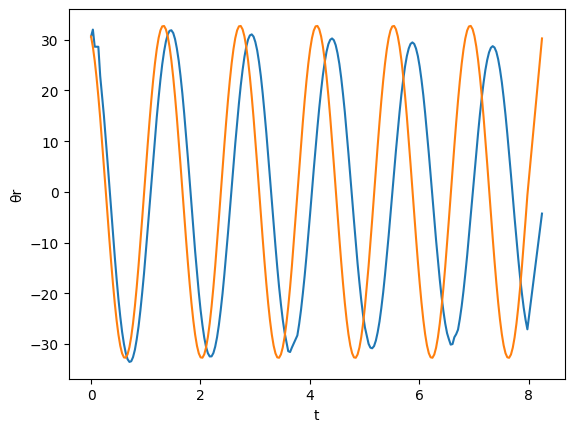

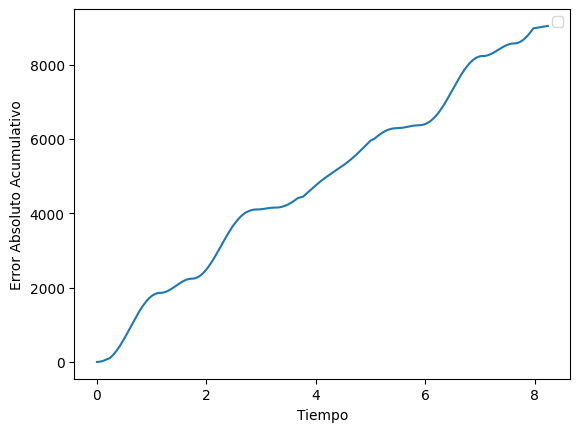

13: plata l0/plata50.csv
1.735


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


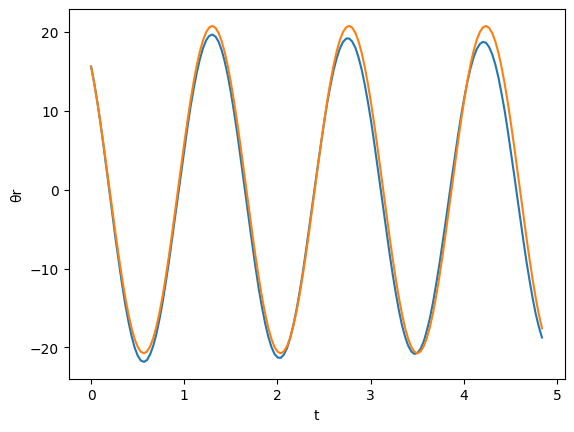

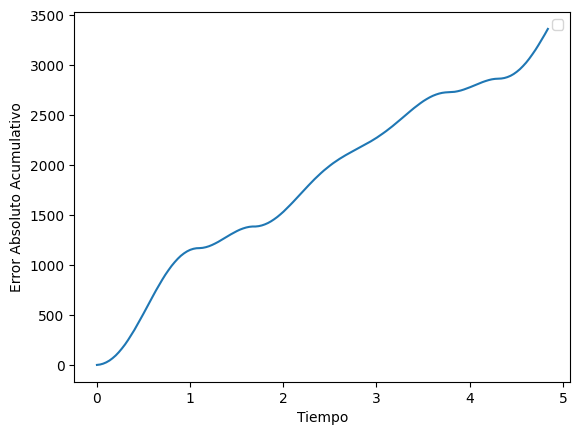

14: plata l0/plata40.csv
1.869


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3295301198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["t"] = data["t"] - data["t"].iloc[0]
/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


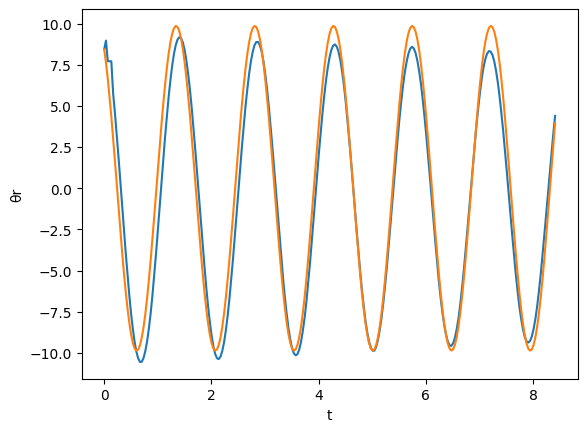

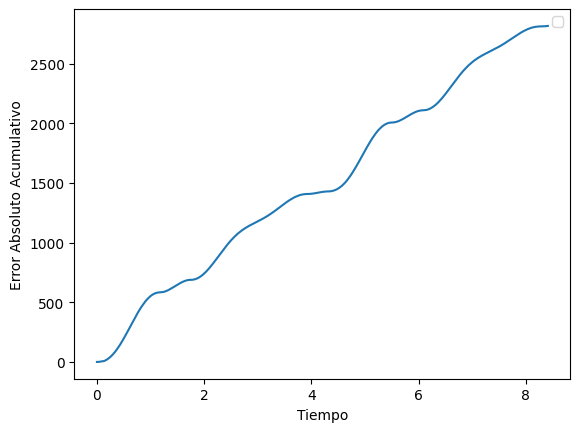

15: plata l0/plata35.csv
1.101


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


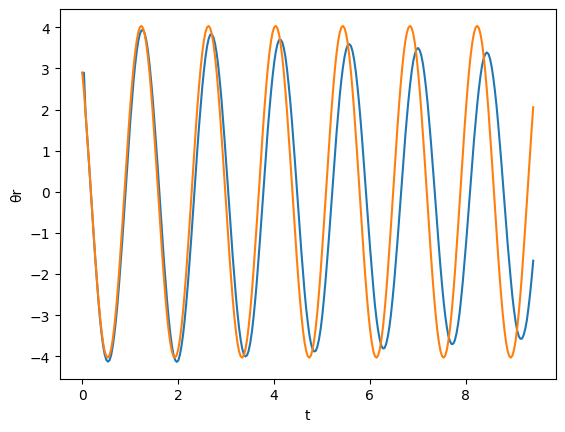

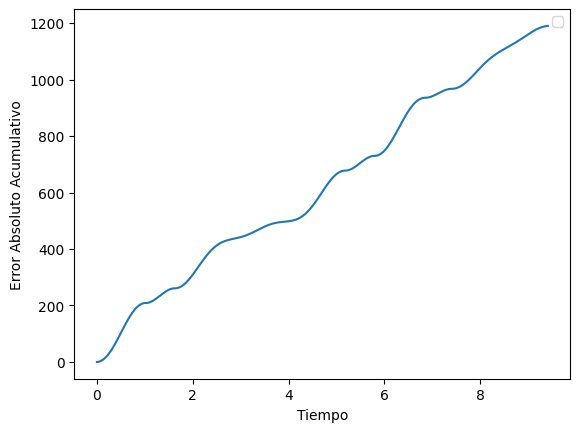

16: plata l1/plata50.csv
1.669


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


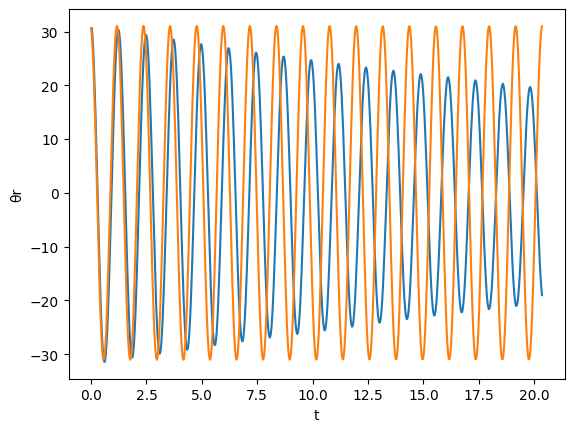

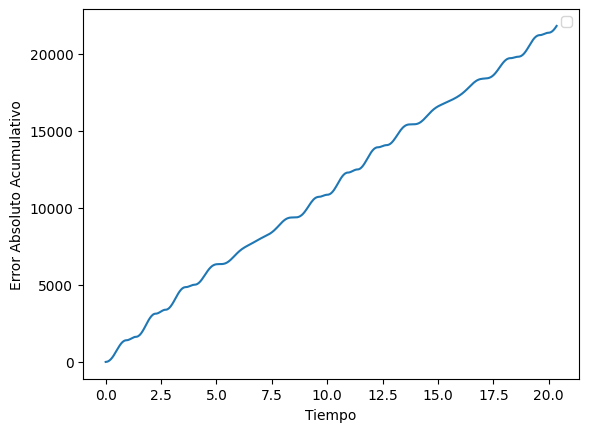

17: plata l1/plata45.csv
1.268


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


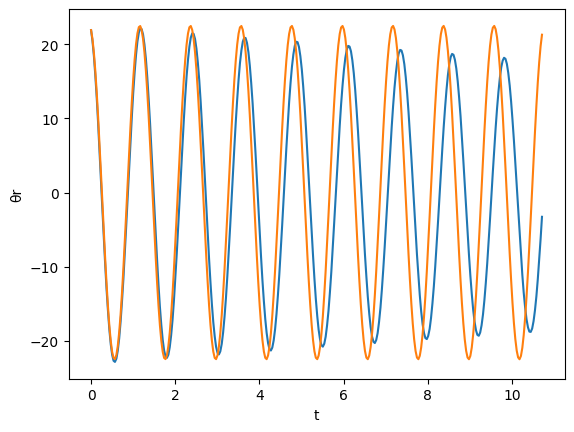

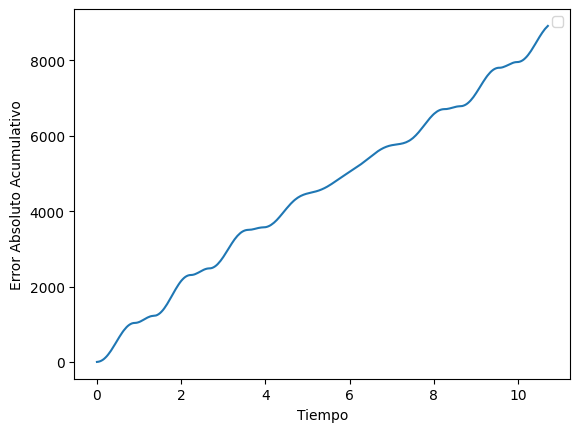

18: plata l1/plata40.csv
1.769


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


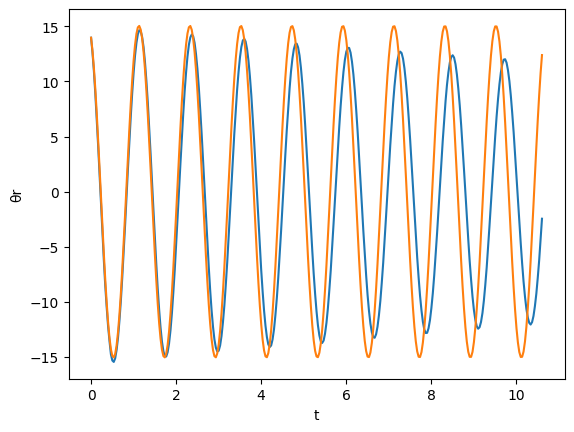

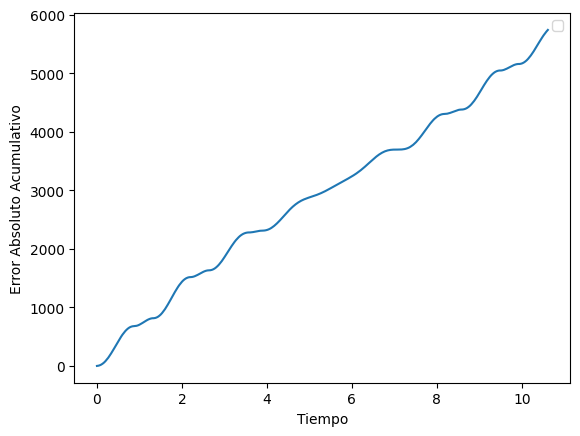

19: plata l1/plata35.csv
1.034


/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2522/3443858946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


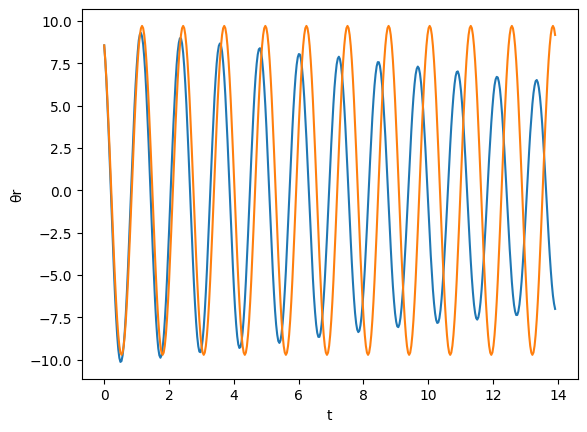

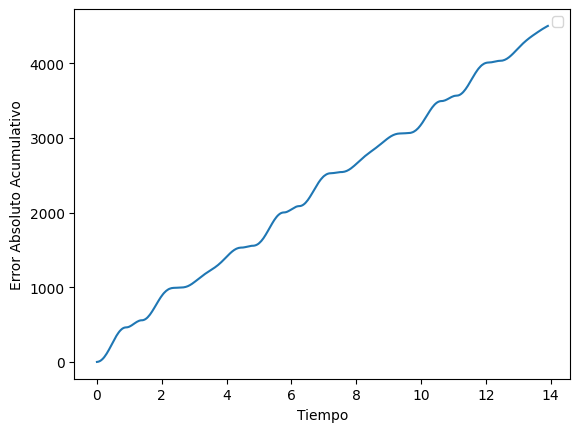

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_approximation(data, tita0, amplitud, frecuencia, periodo):
    x = data["t"]
    delta = np.arcsin(tita0 / amplitud)
    y = amplitud * np.sin(2 * np.pi * (-frecuencia) * x + delta)
    plt.plot(x, y)

def calculate_theoretical_signal(data, tita0, amplitud, frecuencia, T):
    return tita0 + amplitud * np.sin(2 * np.pi * frecuencia * data['t'] / T)

def load_datasets(input_dir):
    datasets = []
    for folder in os.listdir(input_dir):
        folder_path = os.path.join(input_dir, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                if file.endswith('.csv'):
                    datasets.append(os.path.join(folder, file))
    return datasets

def process_dataset(dataset_path):
    data = pd.read_csv(dataset_path)
    L = get_largo(data)
    data = format_pd(data, "θr")
    plot_data(data)
    tita0, amplitud, T, frecuencia = get_tita0(data), get_amplitud(data), get_periodo(data), get_frecuencia(data)
    return data, tita0, amplitud, T, frecuencia

def plot_cumulative_error(data, theoretical_signal):
    try:
        absolute_error = np.abs(data['θr'] - theoretical_signal)
    except KeyError:
        # printear que dataset es
        print(data)
        absolute_error = np.abs(data['θ'] - theoretical_signal)
    
    cumulative_error = np.cumsum(absolute_error)
    
    plt.figure()
    plt.plot(data['t'], cumulative_error)
    plt.xlabel('Tiempo')
    plt.ylabel('Error Absoluto Acumulativo')
    plt.legend()
    plt.show()

def graphs():
    input_dir = os.path.join('..', 'datasets')
    datasets = load_datasets(input_dir)
    
    for i, dataset in enumerate(datasets):
        print(f"{i}: {dataset}")
        dataset_path = os.path.join(input_dir, dataset)
        data, tita0, amplitud, T, frecuencia = process_dataset(dataset_path)
        plot_approximation(data, tita0=tita0, amplitud=amplitud, frecuencia=frecuencia, periodo=T)
        
        theoretical_signal = calculate_theoretical_signal(data, tita0, amplitud, frecuencia, T)
        plot_cumulative_error(data, theoretical_signal)

graphs()
